# GSpacer on LRA instances
Pandas cheatsheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from IPython.core.display import display, HTML

    #Uses commit 1de3ae2d9 csm4 origin/csm4 sane parent for all may_pob. This avoids duplication, allowing application of global generalization on may_pobs as well.


In [3]:
fname='gspc.csv'
csm = pd.read_csv(fname)

#filter out lra instances
csm = csm[csm["index"].str.startswith("chc-lra")]

# move timeout and unknown to maximal time
csm['time'].fillna(value=900, inplace=True)
csm['result'].fillna(value="timeout", inplace=True)
# show a snapshot of data for visual validation
csm.head()

,index,SPACER_cex_depth,SPACER_cluster_out_of_gas,SPACER_concretize,SPACER_conj,SPACER_conj_failed,SPACER_conj_success,SPACER_expand_pob_undef,SPACER_inductive_level,SPACER_max_cluster_size,...,time_spacer_mbp,time_spacer_solve,time_spacer_solve_propagate,time_spacer_solve_reach,time_spacer_solve_reach_children,time_spacer_solve_reach_cluster,time_spacer_solve_reach_gen_bool_ind,time_spacer_solve_reach_gen_global,time_spacer_solve_reach_gen_global_cvx_cls,time_spacer_solve_reach_is_reach
569,chc-lra-0002.smt2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,10.0,2.0,...,0.07,6.99,1.25,5.67,0.19,0.45,3.54,0.04,NaN,NaN
570,chc-lra-0003.smt2,NaN,NaN,NaN,10.0,3.0,19.0,NaN,NaN,1.0,...,0.78,405.66,122.87,282.75,4.79,18.36,196.16,0.76,NaN,0.16
571,chc-lra-0004.smt2,NaN,NaN,NaN,6.0,NaN,6.0,NaN,NaN,4.0,...,0.62,576.79,205.90,370.72,2.92,12.17,291.15,1.28,0.0,NaN
572,chc-lra-0005.smt2,NaN,NaN,NaN,9.0,NaN,14.0,NaN,NaN,4.0,...,0.56,521.30,93.71,427.47,2.14,11.31,364.01,1.08,0.0,0.01
573,chc-lra-0006.smt2,NaN,1.0,NaN,1.0,NaN,3.0,NaN,NaN,4.0,...,0.83,517.14,101.24,415.81,3.48,14.66,320.99,3.74,0.0,0.01


In [4]:
# quick overview of solved/unsolved instances
csm[['result','index']].groupby(['result']).count()

,index
result,
error,1
sat,178
timeout,136
unknown,6
unsat,55


In [5]:
csm.query('result == "unknown"')[["index"]]

,index
715,chc-lra-ts-0014.smt2
732,chc-lra-ts-0031.smt2
734,chc-lra-ts-0033.smt2
754,chc-lra-ts-0053.smt2
771,chc-lra-ts-0070.smt2
796,chc-lra-ts-0095.smt2


Has non linear term in the TR

# Comparison with base solver

In [6]:
fname = "spc.csv"
base = pd.read_csv(fname)
base['time'].fillna(value=900, inplace=True)
base['result'].fillna(value="timeout", inplace=True)
base[['result','index']].groupby(['result']).count()

,index
result,
error,1
sat,161
timeout,152
unknown,6
unsat,56


In [7]:
comb = pd.merge(csm, base, on = "index", how = "inner")
comb = comb[comb["index"].str.startswith("chc-lra")]
#sanity check. Make sure they don't disagree
comb.query('(result_x == "sat" & result_y == "unsat") | (result_y == "sat" & result_x == "unsat")')

,index,SPACER_cex_depth_x,SPACER_cluster_out_of_gas,SPACER_concretize,SPACER_conj,SPACER_conj_failed,SPACER_conj_success,SPACER_expand_pob_undef_x,SPACER_inductive_level_x,SPACER_max_cluster_size,...,time_spacer_ctp_y,time_spacer_init_rules_y,time_spacer_init_rules_pt_init_y,time_spacer_mbp_y,time_spacer_solve_y,time_spacer_solve_propagate_y,time_spacer_solve_reach_y,time_spacer_solve_reach_children_y,time_spacer_solve_reach_gen_bool_ind_y,time_spacer_solve_reach_is_reach_y


In [8]:
comb[['result_x', 'result_y', 'index']].groupby(['result_x', 'result_y']).count()

index
result_x result_y       
error    error         1
sat      sat         160
         timeout      18
timeout  sat           1
         timeout     134
         unsat         1
unknown  unknown       6
unsat    unsat        55

In [9]:
#instances solved only by global spacer
comb.query('(result_x == "sat" & result_y != "sat")')[["index", "SPACER_max_depth_x","time_x"]]

,index,SPACER_max_depth_x,time_x
17,chc-lra-0020.smt2,4.0,535.80
30,chc-lra-0033.smt2,4.0,452.14
97,chc-lra-0100.smt2,25.0,323.21
138,chc-lra-ts-0006.smt2,4.0,0.05
142,chc-lra-ts-0010.smt2,13.0,0.38
143,chc-lra-ts-0011.smt2,13.0,0.39
145,chc-lra-ts-0013.smt2,5.0,0.07
151,chc-lra-ts-0019.smt2,3.0,0.07
154,chc-lra-ts-0022.smt2,15.0,0.50
159,chc-lra-ts-0027.smt2,5.0,0.27


In [10]:
#instances that were solved at a lower depth by global spacer.
comb.query('(result_x == "sat" & result_y == "sat") & (SPACER_max_depth_y > SPACER_max_depth_x )')[["index", "SPACER_max_depth_x","time_x", "SPACER_max_depth_y"]]

,index,SPACER_max_depth_x,time_x,SPACER_max_depth_y
35,chc-lra-0038.smt2,21.0,29.76,22.0
52,chc-lra-0055.smt2,3.0,173.12,6.0
56,chc-lra-0059.smt2,37.0,118.78,41.0
57,chc-lra-0060.smt2,18.0,11.55,22.0
82,chc-lra-0085.smt2,21.0,21.39,23.0
90,chc-lra-0093.smt2,34.0,524.33,35.0
148,chc-lra-ts-0016.smt2,12.0,0.19,13.0
186,chc-lra-ts-0054.smt2,18.0,2.89,19.0
198,chc-lra-ts-0066.smt2,13.0,1.60,15.0
265,chc-lra-ts-0133.smt2,22.0,10.45,23.0


In [11]:
#instances that were solved faster by global spacer.
comb.query('(result_x == "sat" & result_y == "sat") & (time_y > time_x )')[["index", "SPACER_max_depth_x", "SPACER_max_depth_y", "time_x", "time_y"]]

,index,SPACER_max_depth_x,SPACER_max_depth_y,time_x,time_y
13,chc-lra-0016.smt2,4.0,4.0,212.05,252.29
52,chc-lra-0055.smt2,3.0,6.0,173.12,205.54
56,chc-lra-0059.smt2,37.0,41.0,118.78,123.46
62,chc-lra-0065.smt2,4.0,4.0,316.13,514.85
80,chc-lra-0083.smt2,2.0,2.0,4.42,4.55
198,chc-lra-ts-0066.smt2,13.0,15.0,1.60,2.50
242,chc-lra-ts-0110.smt2,4.0,4.0,331.49,476.89
278,chc-lra-ts-0146.smt2,4.0,4.0,111.65,166.10
302,chc-lra-ts-0170.smt2,4.0,4.0,454.85,482.49
310,chc-lra-ts-0178.smt2,4.0,4.0,283.58,369.65


In [12]:
#instances solved only by base
comb.query('(result_x != "sat" & result_y == "sat")')[["index", "SPACER_max_depth_x","SPACER_max_depth_y", "time_x"]]

,index,SPACER_max_depth_x,SPACER_max_depth_y,time_x
267,chc-lra-ts-0135.smt2,4.0,4.0,598.75


In [13]:
#the gspacer had to search deeper to find the inductive invariant
comb[((comb["result_x"] == "sat") & (comb["result_y"] == "sat") & (comb["SPACER_max_depth_x"] > comb["SPACER_max_depth_y"] ))][["index", "SPACER_max_depth_x", "SPACER_max_depth_y"]]

,index,SPACER_max_depth_x,SPACER_max_depth_y
49,chc-lra-0052.smt2,8.0,7.0
55,chc-lra-0058.smt2,4.0,3.0
83,chc-lra-0086.smt2,23.0,21.0
152,chc-lra-ts-0020.smt2,54.0,52.0
196,chc-lra-ts-0064.smt2,12.0,8.0
213,chc-lra-ts-0081.smt2,11.0,10.0
271,chc-lra-ts-0139.smt2,15.0,13.0
277,chc-lra-ts-0145.smt2,18.0,14.0
279,chc-lra-ts-0147.smt2,32.0,30.0
289,chc-lra-ts-0157.smt2,30.0,28.0


In [14]:
#solved at the same depth
comb[((comb["result_x"] == "sat") & (comb["result_y"] == "sat") & (comb["SPACER_max_depth_x"] == comb["SPACER_max_depth_y"]) & (comb["SPACER_max_depth_x"] > 20))][["index", "SPACER_max_depth_x", "SPACER_max_depth_y"]]

,index,SPACER_max_depth_x,SPACER_max_depth_y
32,chc-lra-0035.smt2,25.0,25.0
61,chc-lra-0064.smt2,28.0,28.0
66,chc-lra-0069.smt2,32.0,32.0
72,chc-lra-0075.smt2,28.0,28.0
73,chc-lra-0076.smt2,28.0,28.0
139,chc-lra-ts-0007.smt2,130.0,130.0
150,chc-lra-ts-0018.smt2,130.0,130.0
161,chc-lra-ts-0029.smt2,102.0,102.0
173,chc-lra-ts-0041.smt2,201.0,201.0
245,chc-lra-ts-0113.smt2,22.0,22.0


In [15]:
#instances that were solved slower by global spacer.
d = comb.query('(result_x == "sat" & result_y == "sat") & (time_y < time_x )')
d[["index", "SPACER_max_depth_x", "SPACER_max_depth_y", "time_x", "time_y"]]

,index,SPACER_max_depth_x,SPACER_max_depth_y,time_x,time_y
0,chc-lra-0002.smt2,16.0,16.0,7.14,6.23
6,chc-lra-0009.smt2,4.0,4.0,14.02,13.34
7,chc-lra-0010.smt2,4.0,4.0,4.94,4.76
8,chc-lra-0011.smt2,11.0,11.0,11.82,8.76
10,chc-lra-0013.smt2,4.0,4.0,71.21,35.44
...,...,...,...,...,...
343,chc-lra-ts-0211.smt2,32.0,38.0,113.83,68.69
355,chc-lra-ts-0223.smt2,26.0,24.0,343.25,266.47
361,chc-lra-ts-0229.smt2,15.0,15.0,44.63,35.87
363,chc-lra-ts-0231.smt2,9.0,9.0,1.71,1.64


len(A): 178 	len(B): 161
No. values 160
Min val, A: 1.0 	B: 1.0
Max val, A: 201.0 	B: 201.0
Avg val, A: 12.03 	B: 12.04


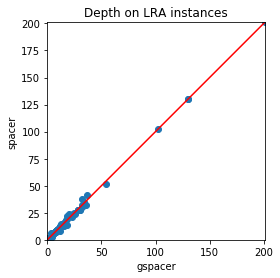

In [16]:
def preprocess(df, sat):  
    if sat == True:
        return df.query('result == "sat"')
    else:
        return df.query('result == "unsat"')
        
def compare_values(columns, df_A, df_B):
    vals_A = df_A[['index'] + list(columns)]
    vals_B = df_B[['index'] + list(columns)]
    merged = vals_A.merge(vals_B, how='inner', left_index=True, on='index')
    return merged

def scatter_values(column, df_A, df_B, lbl_x, lbl_y, tlt):
    vals = compare_values((column, ), df_A, df_B)
    xlabel = column + '_x'
    ylabel = column + '_y'
    
    xs = vals[xlabel]
    ys = vals[ylabel]
    
    print('len(A):', len(df_A), '\tlen(B):', len(df_B))
    print('No. values', len(xs))
    print('Min val, A:', min(xs), '\tB:', min(ys))
    print('Max val, A:', max(xs), '\tB:', max(ys))
    print('Avg val, A:', "{:0.2f}".format(np.mean(xs)), '\tB:', "{:0.2f}".format(np.mean(ys)))
    
    min_val = min(0, min(xs), min(ys))
    max_val = max(max(xs), max(ys))
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)
    
    plt.scatter(xs, ys)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel(lbl_x)
    plt.ylabel(lbl_y)
    
    mid_x = np.linspace(min_val, max_val, 2)
    mid_y = mid_x
    plt.plot(mid_x, mid_y, 'r-')
    plt.title(tlt)
    
    plt.rcParams['figure.dpi'] = 160
    plt.draw()
    

chc_csm = preprocess(csm, True)
chc_base = preprocess(base, True)

scatter_values('SPACER_max_depth', chc_csm, chc_base,"gspacer", "spacer", "Depth on LRA instances")

len(A): 178 	len(B): 161
No. values 160
Min val, A: 0.01 	B: 0.01
Max val, A: 580.52 	B: 561.72
Avg val, A: 55.06 	B: 42.65


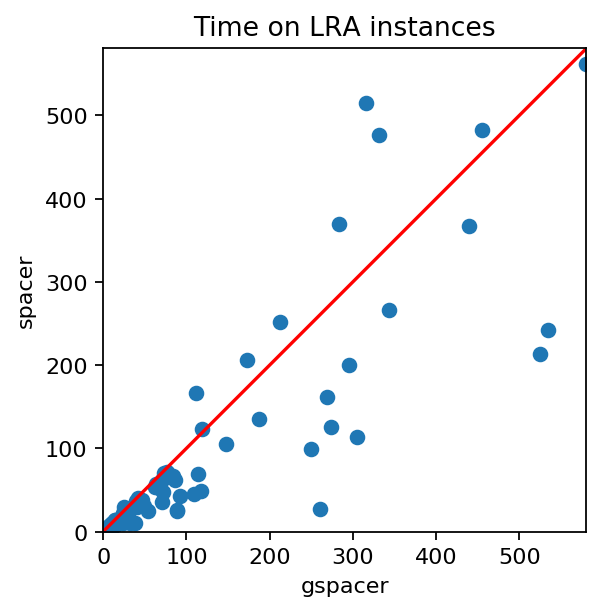

In [17]:
scatter_values('time', chc_csm, chc_base, "gspacer", "spacer", "Time on LRA instances")

# Comparison with no-iuc

In [19]:
fname = "gspc-sc.csv"
gspcnoiuc = pd.read_csv(fname)
#filter out lra instances
gspcnoiuc = gspcnoiuc[gspcnoiuc["index"].str.startswith("chc-lra")]

gspcnoiuc['time'].fillna(value=900, inplace=True)
gspcnoiuc['result'].fillna(value="no-result-produced", inplace=True)
gspcnoiuc[['result','index']].groupby(['result']).count()

,index
result,
error,1
sat,171
timeout,144
unknown,5
unsat,55


In [20]:
comb = pd.merge(csm, gspcnoiuc, on = "index", how = "inner")
#sanity check. Make sure they don't disagree
comb.query('(result_x == "sat" & result_y == "unsat") | (result_y == "sat" & result_x == "unsat")')

,index,SPACER_cex_depth_x,SPACER_cluster_out_of_gas_x,SPACER_concretize_x,SPACER_conj_x,SPACER_conj_failed_x,SPACER_conj_success_x,SPACER_expand_pob_undef_x,SPACER_inductive_level_x,SPACER_max_cluster_size_x,...,time_spacer_mbp_y,time_spacer_solve_y,time_spacer_solve_propagate_y,time_spacer_solve_reach_y,time_spacer_solve_reach_children_y,time_spacer_solve_reach_cluster_y,time_spacer_solve_reach_gen_bool_ind_y,time_spacer_solve_reach_gen_global_y,time_spacer_solve_reach_gen_global_cvx_cls_y,time_spacer_solve_reach_is_reach_y


In [21]:
comb[['result_x', 'result_y', 'index']].groupby(['result_x', 'result_y']).count()

index
result_x result_y       
error    error         1
sat      sat         161
         timeout      17
timeout  sat           9
         timeout     127
unknown  sat           1
         unknown       5
unsat    unsat        55

In [22]:
comb.query('(result_x == "unknown" & result_y == "sat")')

,index,SPACER_cex_depth_x,SPACER_cluster_out_of_gas_x,SPACER_concretize_x,SPACER_conj_x,SPACER_conj_failed_x,SPACER_conj_success_x,SPACER_expand_pob_undef_x,SPACER_inductive_level_x,SPACER_max_cluster_size_x,...,time_spacer_mbp_y,time_spacer_solve_y,time_spacer_solve_propagate_y,time_spacer_solve_reach_y,time_spacer_solve_reach_children_y,time_spacer_solve_reach_cluster_y,time_spacer_solve_reach_gen_bool_ind_y,time_spacer_solve_reach_gen_global_y,time_spacer_solve_reach_gen_global_cvx_cls_y,time_spacer_solve_reach_is_reach_y
146,chc-lra-ts-0014.smt2,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,...,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


This is an interesting instance. It has non linear arithmetic terms in the TR. Interpolation seems to throw an exception on this instance(proof check failed on a lemma with a non linear term). However, GSpacer can solve it without interpolation

In [23]:
#instances solved only with interpolation
comb.query('(result_x == "sat" & result_y != "sat")')[["index", "SPACER_max_depth_x","time_x", "SPACER_need_sage_y"]]

,index,SPACER_max_depth_x,time_x,SPACER_need_sage_y
61,chc-lra-0064.smt2,28.0,294.93,NaN
137,chc-lra-ts-0005.smt2,2.0,0.02,NaN
139,chc-lra-ts-0007.smt2,130.0,88.14,NaN
142,chc-lra-ts-0010.smt2,13.0,0.38,NaN
143,chc-lra-ts-0011.smt2,13.0,0.39,NaN
145,chc-lra-ts-0013.smt2,5.0,0.07,NaN
150,chc-lra-ts-0018.smt2,130.0,89.04,NaN
159,chc-lra-ts-0027.smt2,5.0,0.27,NaN
173,chc-lra-ts-0041.smt2,201.0,7.55,NaN
184,chc-lra-ts-0052.smt2,2.0,0.03,NaN


Re-running the two instances with Sage did not result in convergence. 

len(A): 171 	len(B): 178
No. values 161
Min val, A: 1.0 	B: 1.0
Max val, A: 102.0 	B: 102.0
Avg val, A: 9.76 	B: 9.35


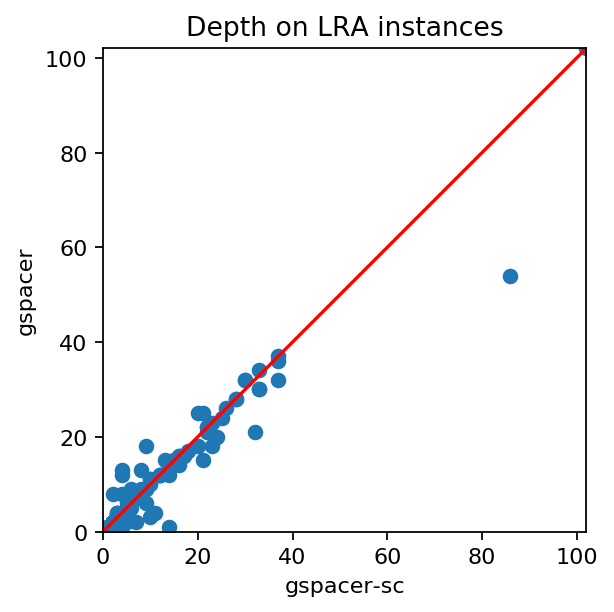

In [24]:
chc_no_iuc = preprocess(gspcnoiuc, True)

scatter_values('SPACER_max_depth', chc_csm, chc_no_iuc, "gspacer", "gspacer-sc",  "Depth on LRA instances")

len(A): 178 	len(B): 171
No. values 161
Min val, A: 0.01 	B: 0.01
Max val, A: 558.45 	B: 583.38
Avg val, A: 57.13 	B: 48.76


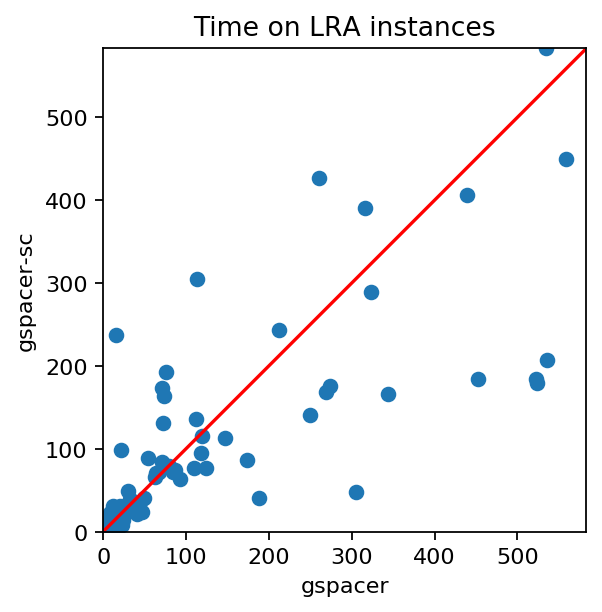

In [25]:
scatter_values('time', chc_csm, chc_no_iuc, "gspacer", "gspacer-sc",  "Time on LRA instances")

In [28]:
#instances that were solved at a lower depth with interpolation
comb.query('(result_x == "sat" & result_y == "sat") & (SPACER_max_depth_y > SPACER_max_depth_x )')[["index", "SPACER_max_depth_x","time_x", "SPACER_max_depth_y"]]

,index,SPACER_max_depth_x,time_x,SPACER_max_depth_y
0,chc-lra-0002.smt2,16.0,7.14,17.0
35,chc-lra-0038.smt2,21.0,29.76,22.0
57,chc-lra-0060.smt2,18.0,11.55,23.0
82,chc-lra-0085.smt2,21.0,21.39,32.0
138,chc-lra-ts-0006.smt2,4.0,0.05,5.0
152,chc-lra-ts-0020.smt2,54.0,15.08,86.0
180,chc-lra-ts-0048.smt2,2.0,0.03,4.0
181,chc-lra-ts-0049.smt2,2.0,0.03,4.0
182,chc-lra-ts-0050.smt2,1.0,0.02,4.0
187,chc-lra-ts-0055.smt2,2.0,0.03,3.0


In [29]:
#instances that were solved faster with interpolation.
comb.query('(result_x == "sat" & result_y == "sat") & (time_y > time_x )')[["index", "SPACER_max_depth_x", "SPACER_max_depth_y", "time_x", "time_y"]]

,index,SPACER_max_depth_x,SPACER_max_depth_y,time_x,time_y
0,chc-lra-0002.smt2,16.0,17.0,7.14,14.34
10,chc-lra-0013.smt2,4.0,4.0,71.21,84.22
11,chc-lra-0014.smt2,4.0,4.0,76.13,192.16
13,chc-lra-0016.smt2,4.0,4.0,212.05,243.48
20,chc-lra-0023.smt2,8.0,8.0,73.45,163.21
...,...,...,...,...,...
304,chc-lra-ts-0172.smt2,17.0,18.0,4.94,6.26
324,chc-lra-ts-0192.smt2,2.0,2.0,1.12,1.85
325,chc-lra-ts-0193.smt2,2.0,2.0,1.08,2.18
326,chc-lra-ts-0194.smt2,2.0,2.0,1.09,2.10


In [30]:
#instances solved only without interpolation
comb.query('(result_x != "sat" & result_y == "sat")')[["index", "SPACER_max_depth_x","SPACER_max_depth_y", "time_x"]]

,index,SPACER_max_depth_x,SPACER_max_depth_y,time_x
9,chc-lra-0012.smt2,16.0,16.0,598.90
29,chc-lra-0032.smt2,4.0,4.0,598.77
48,chc-lra-0051.smt2,4.0,4.0,598.90
146,chc-lra-ts-0014.smt2,1.0,1.0,0.02
194,chc-lra-ts-0062.smt2,8562.0,5.0,595.48
248,chc-lra-ts-0116.smt2,4.0,4.0,598.41
300,chc-lra-ts-0168.smt2,4.0,4.0,599.97
308,chc-lra-ts-0176.smt2,4.0,4.0,598.61
311,chc-lra-ts-0179.smt2,4.0,4.0,598.71
313,chc-lra-ts-0181.smt2,4.0,4.0,599.45


In [31]:
#interpolation had dig deeper to find the inductive invariant
comb[((comb["result_x"] == "sat") & (comb["result_y"] == "sat") & (comb["SPACER_max_depth_x"] > comb["SPACER_max_depth_y"]))][["index", "SPACER_max_depth_x", "SPACER_max_depth_y"]]

,index,SPACER_max_depth_x,SPACER_max_depth_y
8,chc-lra-0011.smt2,11.0,10.0
24,chc-lra-0027.smt2,8.0,7.0
32,chc-lra-0035.smt2,25.0,20.0
49,chc-lra-0052.smt2,8.0,2.0
55,chc-lra-0058.smt2,4.0,3.0
66,chc-lra-0069.smt2,32.0,30.0
90,chc-lra-0093.smt2,34.0,33.0
97,chc-lra-0100.smt2,25.0,21.0
148,chc-lra-ts-0016.smt2,12.0,4.0
153,chc-lra-ts-0021.smt2,13.0,4.0


All of these differences are < 10